In [3]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
weather_url = "https://api.open-meteo.com/v1/forecast?latitude=39.7392&longitude=-104.9847&hourly=temperature_2m,precipitation,precipitation_probability,wind_speed_10m,wind_direction_10m&timezone=America%2FDenver&wind_speed_unit=mph&temperature_unit=fahrenheit&precipitation_unit=inch"

In [10]:
def get_json_from_url(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise HTTPError for bad responses (4xx or 5xx)
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"Request failed: {e}")
        return None
    except json.JSONDecodeError:
        print("Failed to decode JSON")
        return None

In [13]:
weather_json = get_json_from_url(weather_url)

weather_df = pd.DataFrame.from_dict(weather_json['hourly'])
weather_df.head()

,time,temperature_2m,precipitation,precipitation_probability,wind_speed_10m,wind_direction_10m
0,2025-05-14T00:00,64.8,0.0,0,2.3,107
1,2025-05-14T01:00,65.5,0.0,0,6.0,243
2,2025-05-14T02:00,59.7,0.0,0,5.9,252
3,2025-05-14T03:00,57.0,0.0,0,3.2,225
4,2025-05-14T04:00,54.2,0.0,0,4.6,67


In [20]:
weather_df['time'] = pd.to_datetime(weather_df['time'])
weather_df['day_name'] = weather_df['time'].dt.strftime('%a')
weather_df['hour'] = weather_df['time'].dt.hour


weather_df.loc[weather_df['hour'] < 25, 'day_part'] = 'night'
weather_df.loc[weather_df['hour'] < 19, 'day_part'] = 'after work'
weather_df.loc[weather_df['hour'] < 15, 'day_part'] = 'early afternoon'
weather_df.loc[weather_df['hour'] < 12, 'day_part'] = 'morning'
weather_df.loc[weather_df['hour'] < 9, 'day_part'] = 'night'

weather_df.head()

,time,temperature_2m,precipitation,precipitation_probability,wind_speed_10m,wind_direction_10m,day_name,hour,day_part
0,2025-05-14 00:00:00,64.8,0.0,0,2.3,107,Wed,0,night
1,2025-05-14 01:00:00,65.5,0.0,0,6.0,243,Wed,1,night
2,2025-05-14 02:00:00,59.7,0.0,0,5.9,252,Wed,2,night
3,2025-05-14 03:00:00,57.0,0.0,0,3.2,225,Wed,3,night
4,2025-05-14 04:00:00,54.2,0.0,0,4.6,67,Wed,4,night


In [27]:
weather_df.groupby(['day_name', 'day_part']).agg(
    day_start = ('time', 'min'),
    temp_high = ('temperature_2m', 'max'),
    temp_low = ('temperature_2m', 'min'),
    hourly_precip = ('precipitation', 'mean'),
    precip_prob_peak = ('precipitation_probability', 'max'),
    wind_speed_peak = ('wind_speed_10m', 'max'),
    wind_spead_avg = ('wind_speed_10m', 'mean'),
    wind_direction_avg = ('wind_direction_10m', 'mean')
).reset_index().sort_values('day_start').drop('day_start', axis=1)

,day_name,day_part,temp_high,temp_low,hourly_precip,precip_prob_peak,wind_speed_peak,wind_spead_avg,wind_direction_avg
27,Wed,night,65.5,47.2,0.000571,28,18.2,6.800000,124.285714
26,Wed,morning,65.2,56.5,0.000000,0,10.7,10.400000,53.000000
25,Wed,early afternoon,72.0,68.5,0.000000,3,14.5,10.766667,84.666667
24,Wed,after work,73.0,60.6,0.000000,21,20.9,16.800000,215.500000
19,Thu,night,63.8,41.5,0.000000,5,15.6,7.642857,217.285714
18,Thu,morning,62.2,56.3,0.000000,1,13.4,10.000000,317.333333
17,Thu,early afternoon,68.9,65.3,0.000000,0,11.9,8.933333,293.333333
16,Thu,after work,68.5,66.7,0.000000,5,17.6,14.775000,307.250000
3,Fri,night,69.0,44.0,0.000000,2,13.0,7.650000,227.642857
2,Fri,morning,64.5,58.7,0.000000,2,15.2,10.833333,310.000000


<Axes: xlabel='day_name'>

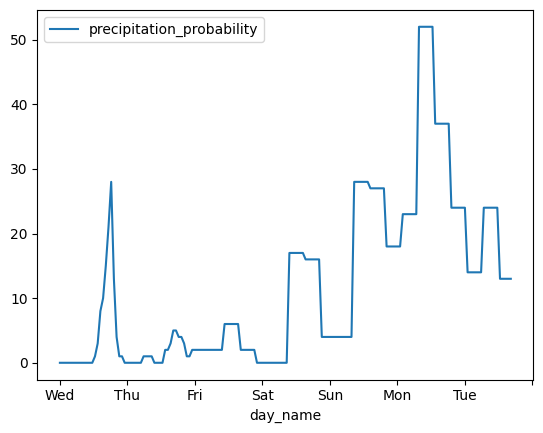

In [33]:
weather_df.plot(x='day_name', y=['precipitation_probability'])